In [3]:
# Major Imports

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras import optimizers, losses

# System libraries
from pathlib import Path
import os.path

# Metrics
import itertools

In [4]:
#Lets get data

train_data = "/kaggle/input/nitrogen-deficiency-for-rice-crop/NitrogenDeficiencyImage/Training"
test_data = "/kaggle/input/nitrogen-deficiency-for-rice-crop/NitrogenDeficiencyImage/Test"

In [5]:
#Apply augmentation to data

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                  shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True, 
                                   fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255.)

In [6]:
# Getting augmented training and testing images

train_images = train_datagen.flow_from_directory(directory = train_data, 
                                                 batch_size = 32, 
                                                 target_size = (224,224), 
                                                 class_mode = "categorical", 
                                                 shuffle = False)
test_images = test_datagen.flow_from_directory(directory = test_data,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical",
                                               shuffle = False)

Found 5390 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [7]:
# Setting up Callback

from keras.callbacks import EarlyStopping
Callback = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

In [9]:
# Model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3) ),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation = 'relu'), #512
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4,activation = 'Softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

In [10]:
history = model.fit(train_images, epochs = 15, validation_data = test_images,callbacks = Callback)

2023-01-02 21:17:53.978870: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
169/169 [==============================] - 199s 1s/step - loss: 1.6491 - accuracy: 0.2846 - val_loss: 1.4135 - val_accuracy: 0.2500
Epoch 2/15
169/169 [==============================] - 192s 1s/step - loss: 1.1737 - accuracy: 0.4525 - val_loss: 1.0757 - val_accuracy: 0.5425
Epoch 3/15
169/169 [==============================] - 194s 1s/step - loss: 1.0346 - accuracy: 0.5725 - val_loss: 0.9842 - val_accuracy: 0.6375
Epoch 4/15
169/169 [==============================] - 193s 1s/step - loss: 1.0041 - accuracy: 0.5876 - val_loss: 1.1578 - val_accuracy: 0.5425
Epoch 5/15
169/169 [==============================] - 195s 1s/step - loss: 0.9669 - accuracy: 0.5577 - val_loss: 1.1344 - val_accuracy: 0.6250
Epoch 6/15
169/169 [==============================] - 195s 1s/step - loss: 1.0604 - accuracy: 0.5410 - val_loss: 0.9657 - val_accuracy: 0.5000
Epoch 7/15
169/169 [==============================] - 195s 1s/step - loss: 0.9730 - accuracy: 0.5219 - val_loss: 0.8412 - val_accuracy: 0.6475

In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

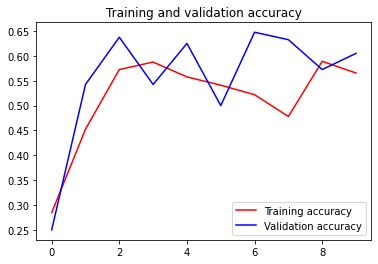

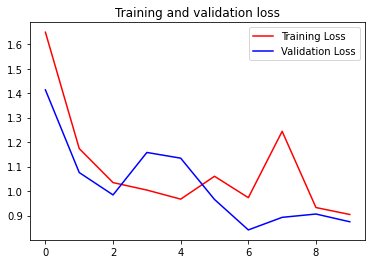

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
# Model 2

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3) ),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'), 
    tf.keras.layers.Dropout(0.5), #0.2
    tf.keras.layers.Dense(4,activation = 'Softmax')
])

model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

In [14]:
history = model2.fit(train_images, epochs = 10, validation_data = test_images,callbacks = Callback)

Epoch 1/10
169/169 [==============================] - 228s 1s/step - loss: 1.3733 - accuracy: 0.3542 - val_loss: 1.0457 - val_accuracy: 0.4825
Epoch 2/10
169/169 [==============================] - 224s 1s/step - loss: 1.1250 - accuracy: 0.4709 - val_loss: 1.6369 - val_accuracy: 0.5325
Epoch 3/10
169/169 [==============================] - 224s 1s/step - loss: 1.1221 - accuracy: 0.5174 - val_loss: 0.9712 - val_accuracy: 0.5725
Epoch 4/10
169/169 [==============================] - 222s 1s/step - loss: 0.9284 - accuracy: 0.5881 - val_loss: 0.8288 - val_accuracy: 0.6675
Epoch 5/10
169/169 [==============================] - 223s 1s/step - loss: 1.4917 - accuracy: 0.4577 - val_loss: 1.1740 - val_accuracy: 0.5050
Epoch 6/10
169/169 [==============================] - 223s 1s/step - loss: 0.9862 - accuracy: 0.5536 - val_loss: 0.8509 - val_accuracy: 0.6750
Epoch 7/10
169/169 [==============================] - 223s 1s/step - loss: 0.9477 - accuracy: 0.5937 - val_loss: 0.9478 - val_accuracy: 0.4700

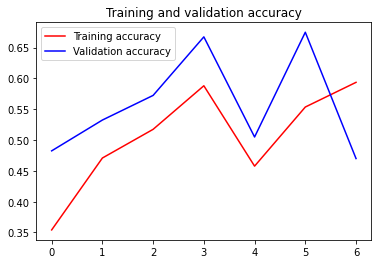

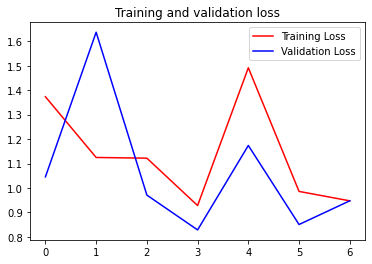

In [15]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
train_images.class_indices

{'swap1': 0, 'swap2': 1, 'swap3': 2, 'swap4': 3}